<a href="https://colab.research.google.com/github/insoochung/bg_obj_remover/blob/feature%2FinstanceSegmentation/InstanceSegmentationMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Installation


Install MMCV, MMEngine

In [1]:
!pip3 install openmim
!mim install mmengine
!mim install "mmcv>=2.0.0,<2.1.0"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 1.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.1/372.1 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.9/200.9 kB 18.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 MB 9.0 MB/s eta 0:00:00


 Install MMDetection from the source

In [2]:
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
!pip install -e .

Cloning into 'mmdetection'...
remote: Enumerating objects: 35529, done.
remote: Counting objects: 100% (193/193), done.
remote: Compressing objects: 100% (173/173), done.
remote: Total 35529 (delta 39), reused 118 (delta 16), pack-reused 35336
Receiving objects: 100% (35529/35529), 47.36 MiB | 26.53 MiB/s, done.
Resolving deltas: 100% (24967/24967), done.
/content/mmdetection
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmdetection
  Preparing metadata (setup.py) ... done
  Running setup.py develop for mmdet


In [3]:
import mmdet
print(mmdet.__version__)

3.0.0


### Instance Segmentation

#### Setup the Model

In [4]:
import torch, torchvision
import mmdet
import mmcv
import mmengine

In [5]:
!mim download mmdet --config mask-rcnn_r50-caffe_fpn_ms-poly-3x_coco --dest ./checkpoints

processing mask-rcnn_r50-caffe_fpn_ms-poly-3x_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 MiB 20.4 MB/s eta 0:00:00
Successfully downloaded mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth to /content/mmdetection/checkpoints
Successfully dumped mask-rcnn_r50-caffe_fpn_ms-poly-3x_coco.py to /content/mmdetection/checkpoints


In [62]:
from mmdet.apis import init_detector, inference_detector
from mmdet.utils import register_all_modules
from mmdet.registry import VISUALIZERS

# Define the cfg
config_file = 'configs/mask_rcnn/mask-rcnn_r50-caffe_fpn_ms-poly-3x_coco.py'

# Setup a checkpoint file to load
checkpoint_file = 'checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth'

# register all modules in mmdet into the registries
register_all_modules()

# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')  # or device='cuda:0'

# Setup the visualizer
visualizer = VISUALIZERS.build(model.cfg.visualizer)
visualizer.dataset_meta = model.dataset_meta

Loads checkpoint by local backend from path: checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth


/usr/local/lib/python3.10/dist-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmdet.visualization.local_visualizer.DetLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(


#### Image Segmentation and plotting

In [15]:
# Mount the gdrive for images
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [69]:
def segment_image(image):
  result = inference_detector(model, image)
  return result

def get_result_info(result):
  output = {}
  # Save the Bounding boxes, labels and masks
  output["bboxes"] = result.pred_instances.bboxes
  output["labels"] = result.pred_instances.labels
  output["masks"] = result.pred_instances.masks
  output["meta"] = result.metainfo
  return output

def visualize_result(visualizer,image,result):
  visualizer.add_datasample(
    'result',
    image,
    data_sample=result,
    draw_gt = None,
    wait_time=0,
  )
  return visualizer
  

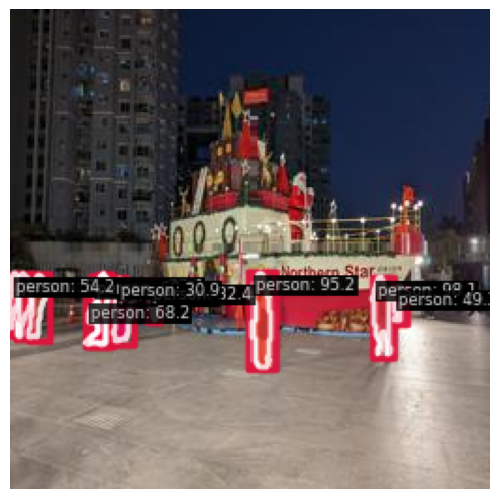

In [70]:
image_path ="/content/drive/MyDrive/748_Test_Images/PXL_20230103_130219194resized.jpg"
image = mmcv.imread(image_path,channel_order='rgb')
result = segment_image(image)
vis = visualize_result(visualizer,image,result)
vis.show()

### Image resize

In [49]:
from PIL import Image

def resize_image(image_path,size = (256,256)):

  # Open the image file
  image = Image.open(image_path)

  # Set the new size for the image
  new_size = (256, 256)

  # Resize the image
  resized_image = image.resize(new_size)

  # Save the resized image
  resized_image.save(image_path.split(".")[0]+"resized.jpg")

  return resized_image



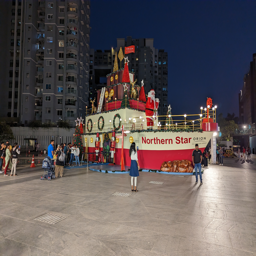

In [50]:
resize_image("/content/drive/MyDrive/748_Test_Images/PXL_20230103_130219194.jpg")